Hassan Issa-Cisse
Artificial Intelligence Midsem Evaluation


In [3]:
import pandas as pd # import pandas for dataframes
from sklearn.datasets import load_boston # import data from sklearn
boston = load_boston() 
boston_df = pd.DataFrame(boston.data)
boston_df.columns= boston.feature_names
boston_df['price' ]= boston.target

1 - Cleaning the data

Let's have a look at the dataset, visually, we will use Pandas for that

In [4]:
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


Then we can check for any missing values or outliers

In [8]:
from scipy import stats
import numpy as np

zs=np.abs(stats.zscore(boston_df))
threshold=3
print(np.where(zs>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Now we can clean the data by removing the outliers

In [9]:
boston_df.shape

(506, 14)

In [11]:
boston_df_o=boston_df[(zs<3).all(axis=1)]

In [12]:
boston_df_o.shape

(415, 14)

We successfully removed 91 rows from the dataset, those were our outliers. Now we have a clean dataset.

2 - Plotting and analysis

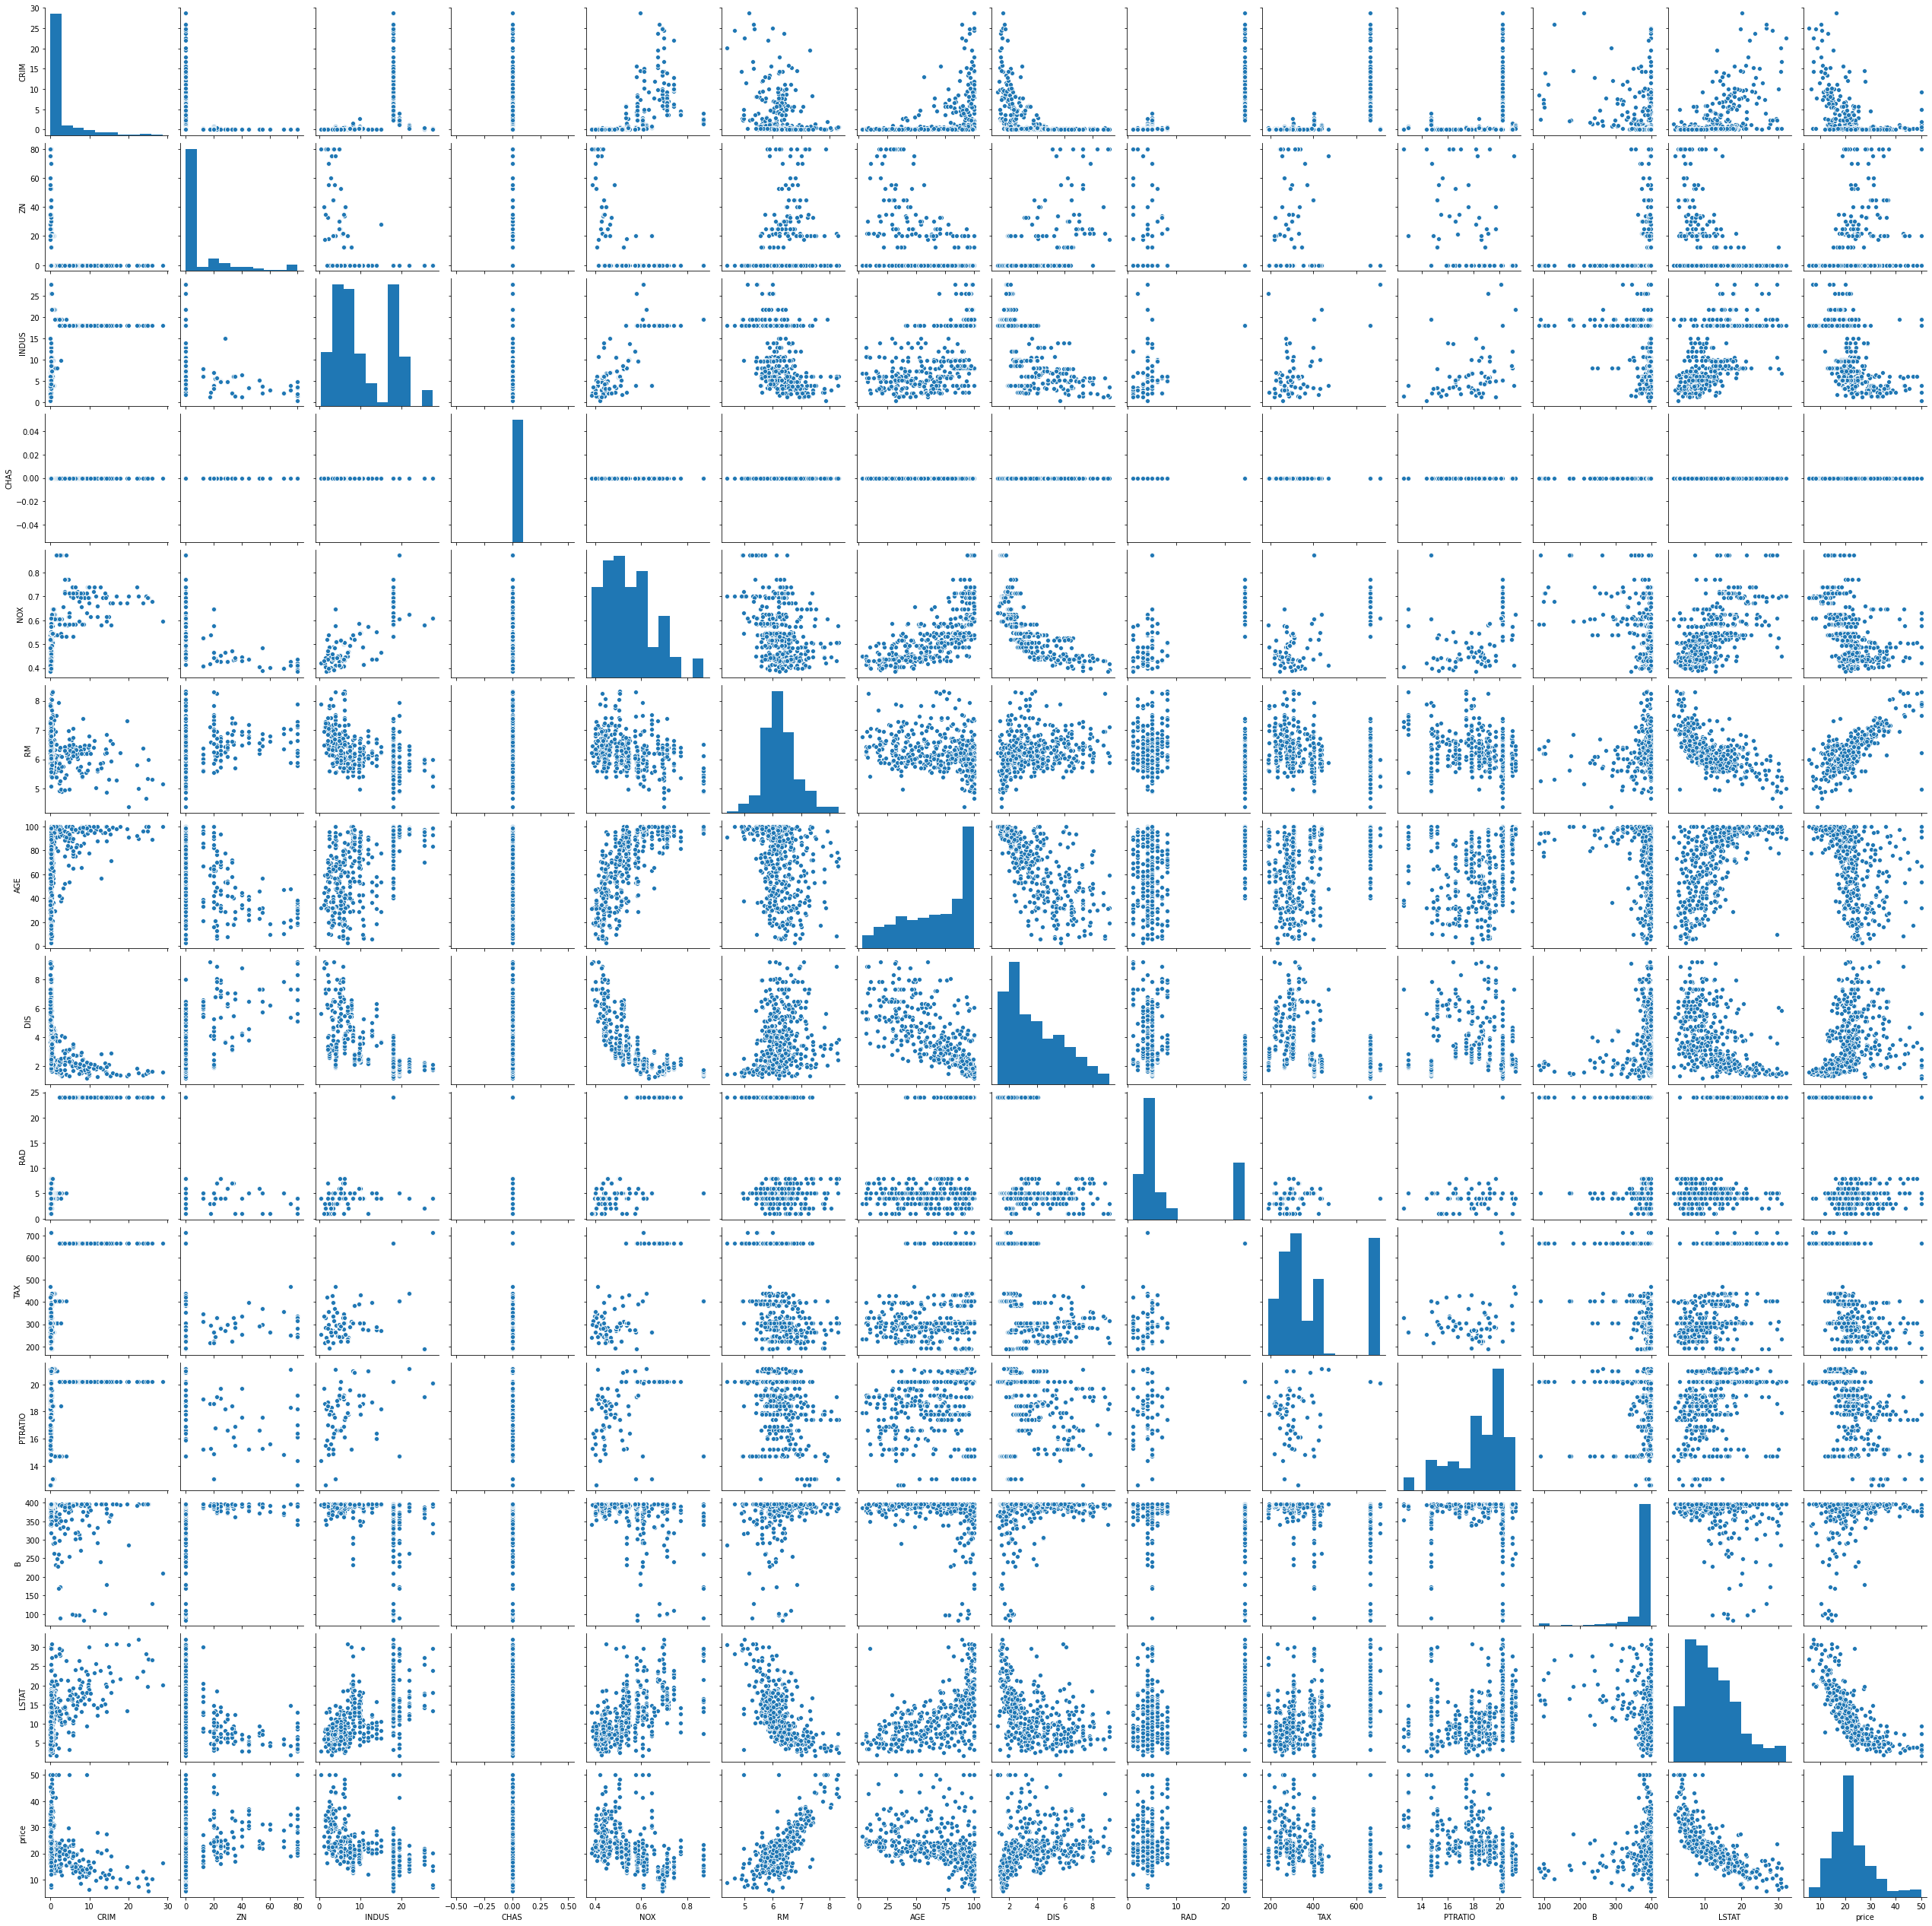

In [13]:
import seaborn as sns
sns.pairplot(boston_df_o)

There is too many attributes in the dataset, so we will carry out analysis on the price attribute

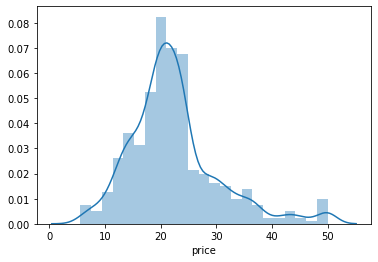

In [14]:
sns.distplot(boston_df_o['price'])

From the diagram , we can see that houses which have their price between 15-25 have the preferences of the population.
The highest being 20-22, meaning that house with a rent around 20 are more chosen than the rest.

3 - Training and testing

We are going to use 75% of the data for training and the remaining 25% for testing purposes

In [17]:
#split the dataset
X=boston_df_o.drop('price',axis=1)
Y=boston_df_o['price']


In [24]:
#train and test

import sklearn


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(311, 13)
(104, 13)
(311,)
(104,)


Here we can see our X_train and Y_train and also the X_test. Since we want to predict the Y_test, we will test our model 

Text(0.5, 1.0, 'Actual Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

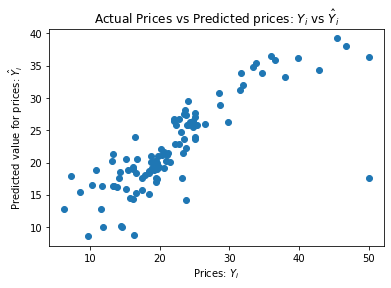

In [26]:
#run the linear regression

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted value for prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

4- Performance Evaluation

We will do that by finding the MSE of our model

In [27]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

24.87565046872909


The MSE is around 25 and from our previous diagram we noticed that our price targert was aroud 20-22. It means that our model is close to the reality